<a href="https://colab.research.google.com/github/mustafa901/2024-US-Presidential-Election-Watcher/blob/Analysis/2024_US_Presidential_Election_Watcher_CS_200_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2024 US Presidential Election Watcher
**Stats and raw data leading into the 2024 political spectacle**

Our plan will include the following:
*   What will be your goal in working on this project?
*   What will be your source for data for the project? If this requires you to gather data, how will you go about this?
*   What data cleaning, conversion, or preparation will you need to do to prepare your data set?
*   What kinds of exploratory data analysis will you do?
*   Which machine learning algorithms will you use to train models? Why are you choosing these algorithms?
*   How will you attempt to optimize your models?

*   How will you analyze the accuracy of your models?


### 1. Project Goal

The goal of this project could be to predict the outcome of the 2024 U.S. Presidential Election based on current polling data. By analyzing trends and voter preferences, we aim to build a predictive model that provides insights into potential election results, helping to understand key factors influencing voter decisions.

### 2. Data Source and Gathering

The primary data source for this project will be the dataset from Kaggle, specifically the 2024 U.S. Presidential Election dataset. This dataset  contains polling data from various sources and times.

### 3. Data Cleaning, Conversion, or Preparation
- **Cleaning:** Handling missing values, removing duplicates, and correcting erroneous entries.
- **Conversion:** Converting data types as appropriate, for example, changing dates into a datetime format.
- **Feature Engineering:** Creating new features that could improve model performance, such as deriving the time until the election from the date data or encoding categorical variables like state names.
- **Normalization/Standardization:** Standardizing scales for numerical data to improve model training.

### 4. Exploratory Data Analysis (EDA)
- **Distribution Analysis:** Analyzing the distribution of key variables (e.g., poll numbers).
- **Trend Analysis:** Looking at how poll results change over time.
- **Correlation Analysis:** Identifying relationships between different features, like demographic indicators and polling preferences.
- **Visualization:** Using plots like histograms, scatter plots, and time series graphs to visualize trends and distributions.

### 5. Machine Learning Algorithms
- **Logistic Regression:** A good baseline for binary outcomes like election results (win/loss).
- **Random Forests and Gradient Boosting Machines (GBM):** These ensemble methods are robust against overfitting and good for handling heterogeneous data .
- **Support Vector Machines (SVM):** Will use SVM if the decision boundary between classes is not linear.
- **Neural Networks:** Will use NN if there are complex patterns in the data that simpler models wouldn't be able capture.


### 6. Model Optimization
- **Cross-Validation:** To ensure the model generalizes well over unseen data.
- **Grid Search:** To fine-tune hyperparameters for optimal performance.
- **Feature Selection:** To identify and retain the most informative features, reducing the risk of overfitting and improving model efficiency.

### 7. Accuracy Analysis
- **Confusion Matrix:** To see true positives, false positives, true negatives, and false negatives.
- **Accuracy Score:** Overall accuracy of the model.
- **Precision, Recall, and F1 Score:** To balance the trade-offs between catching true positives and avoiding false positives.
- **ROC Curves and AUC Scores:** To assess the performance across different classification thresholds.


# Importing the dataset

In [8]:
import requests
import pandas as pd

# Correct URL to the raw content of the CSV file
#df_polls_uploaded = 'https://raw.githubusercontent.com/mustafa901/2024-US-Presidential-Election-Watcher/main/polls/president_polls.csv'
#r = requests.get(df_polls_uploaded)
# Load the uploaded dataset
df_polls_uploaded = pd.read_csv('https://raw.githubusercontent.com/mustafa901/2024-US-Presidential-Election-Watcher/main/polls/president_polls.csv')

# Display basic information about the dataset and the first few rows to understand its structure
df_polls_uploaded.info(), df_polls_uploaded.head()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4067 entries, 0 to 4066
Data columns (total 44 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   poll_id                    4067 non-null   int64  
 1   pollster_id                4067 non-null   int64  
 2   pollster                   4067 non-null   object 
 3   sponsor_ids                1468 non-null   object 
 4   sponsors                   1468 non-null   object 
 5   display_name               4067 non-null   object 
 6   pollster_rating_id         4067 non-null   int64  
 7   pollster_rating_name       4067 non-null   object 
 8   fte_grade                  3924 non-null   object 
 9   methodology                3977 non-null   object 
 10  transparency_score         815 non-null    float64
 11  state                      1085 non-null   object 
 12  start_date                 4067 non-null   object 
 13  end_date                   4067 non-null   objec

(None,
    poll_id  pollster_id         pollster sponsor_ids sponsors  \
 0    84599         1189  Morning Consult         NaN      NaN   
 1    84599         1189  Morning Consult         NaN      NaN   
 2    84599         1189  Morning Consult         NaN      NaN   
 3    84599         1189  Morning Consult         NaN      NaN   
 4    84594         1709      Big Village         NaN      NaN   
 
       display_name  pollster_rating_id pollster_rating_name fte_grade  \
 0  Morning Consult                 218      Morning Consult        B-   
 1  Morning Consult                 218      Morning Consult        B-   
 2  Morning Consult                 218      Morning Consult        B-   
 3  Morning Consult                 218      Morning Consult        B-   
 4      Big Village                  37          Big Village        B-   
 
     methodology  ...  election_date    stage nationwide_batch  \
 0  Online Panel  ...        11/5/24  general            False   
 1  Online Panel 

Variables
* poll_id: Identifier for each poll.
* pollster: Name of the organization conducting the poll.
* start_date and end_date: Date range during which the poll was conducted.
* state: The state in which the poll was conducted (if applicable).
* sample_size: The number of respondents in the poll.
* methodology: Method used to conduct the poll (e.g., Online Panel, Telephone).
* population: Demographic group targeted by the poll (e.g., adults, likely voters).
* answer: The candidate chosen in the poll.
* candidate_name: Full name of the candidate.
* pct: Percentage of respondents supporting the candidate.



# Data Cleaning

# EDA

<ipython-input-9-0ea5614f00f5>:12: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_polls_uploaded['start_date'] = pd.to_datetime(df_polls_uploaded['start_date'])  # Convert to datetime
<ipython-input-9-0ea5614f00f5>:13: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_polls_uploaded['end_date'] = pd.to_datetime(df_polls_uploaded['end_date'])  # Convert to datetime


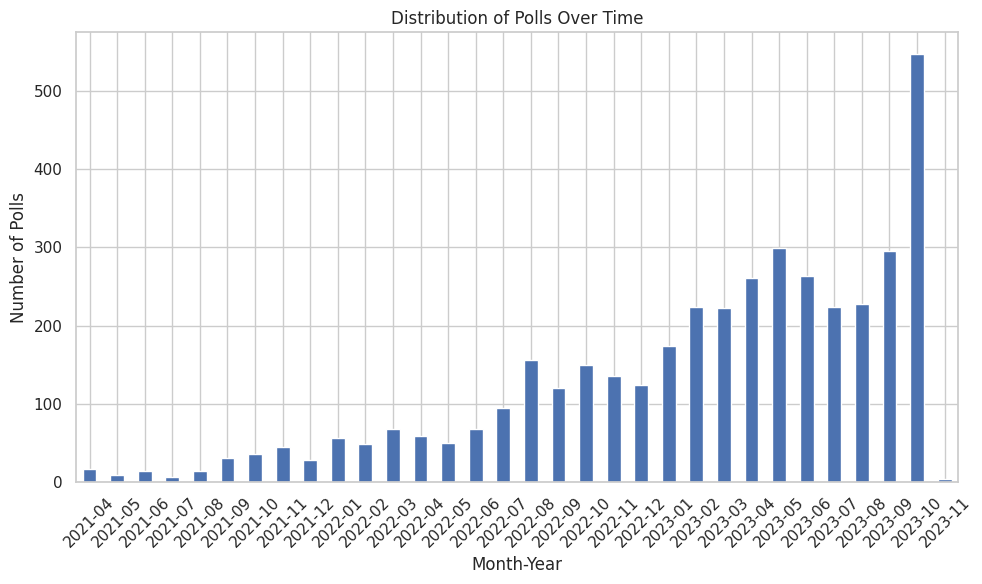

(        sample_size          pct
 count   4049.000000  4067.000000
 mean    1942.180044    40.814979
 std     1983.078075     7.836942
 min      300.000000     1.000000
 25%     1000.000000    39.000000
 50%     1180.000000    42.000000
 75%     2004.000000    45.000000
 max    26230.000000    67.600000,
 None)

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting aesthetic parameters for seaborn
sns.set(style="whitegrid")

# Descriptive Statistics for numerical fields
numerical_stats = df_polls_uploaded[['sample_size', 'pct']].describe()

# Distribution of Polls Over Time
plt.figure(figsize=(10, 6))
df_polls_uploaded['start_date'] = pd.to_datetime(df_polls_uploaded['start_date'])  # Convert to datetime
df_polls_uploaded['end_date'] = pd.to_datetime(df_polls_uploaded['end_date'])  # Convert to datetime
df_polls_uploaded['start_date'].dt.to_period("M").value_counts().sort_index().plot(kind='bar')
plt.title('Distribution of Polls Over Time')
plt.xlabel('Month-Year')
plt.ylabel('Number of Polls')
plt.xticks(rotation=45)
plt.tight_layout()

numerical_stats, plt.show()


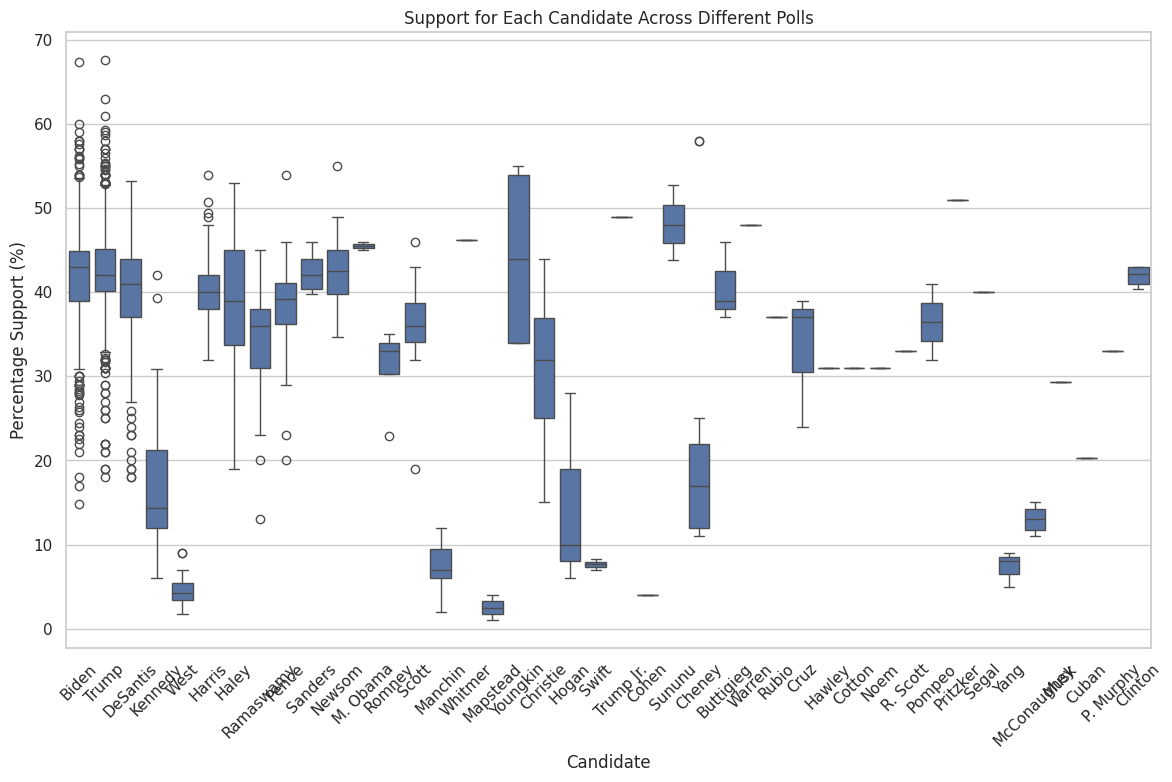

In [10]:
# Visualizing the support each candidate receives across different polls

plt.figure(figsize=(14, 8))
sns.boxplot(x='answer', y='pct', data=df_polls_uploaded)
plt.title('Support for Each Candidate Across Different Polls')
plt.xlabel('Candidate')
plt.ylabel('Percentage Support (%)')
plt.xticks(rotation=45)
plt.show()
